<a href="https://colab.research.google.com/github/skssushil/CS208/blob/master/SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import files 
uploaded =files.upload()

Saving AMZN-DUK-KO.csv to AMZN-DUK-KO.csv


In [4]:
import io
data = pd.read_csv(io.BytesIO(uploaded['AMZN-DUK-KO.csv']))
print(data.head(2))
print("The shape of sample data = ", data.shape)

         Date       AMZN        DUK         KO
0  03-01-2007  38.700001  34.971017  17.874906
1  04-01-2007  38.900002  35.044103  17.882263
The shape of sample data =  (2519, 4)


In [7]:
Date = data['Date']
# Droping date parameter
f_data = data.drop("Date",axis=1)
print(f_data.head(2))
print(f_data.shape)

        AMZN        DUK         KO
0  38.700001  34.971017  17.874906
1  38.900002  35.044103  17.882263
(2519, 3)


In [14]:
U, s, V = np.linalg.svd(f_data)
print(U.shape,s.shape,V.shape)

(2519, 2519) (3,) (3, 3)


In [36]:
from sklearn.decomposition import TruncatedSVD
# calculating svd to reduduced the features to 2
svd = TruncatedSVD(n_components=2)
X_reduced = svd.fit_transform(f_data)
print(X_reduced.shape)
print(X_reduced)

(2519, 2)
[[ 44.81391958 -32.00814912]
 [ 45.02240766 -32.03940821]
 [ 44.37090442 -31.38866938]
 ...
 [768.86618953  44.17045633]
 [753.7391434   41.97345448]
 [757.52834376  42.35620752]]


In [32]:
# creating a new data frame for ploting 
dataframe=pd.DataFrame(X_reduced,columns=['1st','2nd'])
print(dataframe.head(5))

         1st        2nd
0  44.813920 -32.008149
1  45.022408 -32.039408
2  44.370904 -31.388669
3  43.531396 -31.641312
4  43.784297 -31.462720


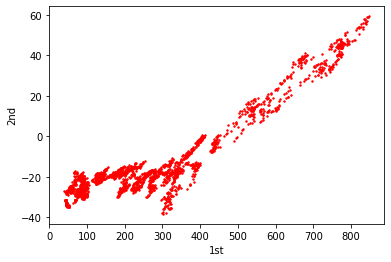

In [37]:
import matplotlib.pyplot as plt
# ploting the features parameters
ax1 = dataframe.plot.scatter(x='1st',y='2nd',s=2,c='red')
plt.show()